In [63]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
from tabGAN.tabGAN import TableGAN
from src import constants as const
import utils

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [65]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [66]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [67]:
%load_ext line_profiler
n_epochs = 100
n_critic = 10
adam_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0

retrain = False

tg_qtr = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


TypeError: __init__() got an unexpected keyword argument 'adam_lr'

In [55]:
%lprun?

  0%|          | 0/100 [00:00<?, ?it/s]

Elapsed time: 1534.201910 seconds.



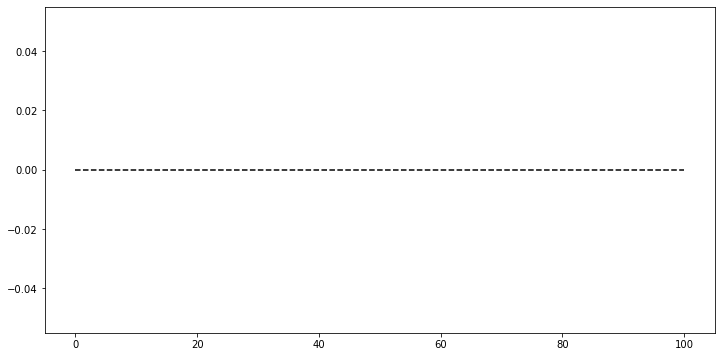

In [62]:
tic()
with tf.device('/CPU:0'):
    tg_qtr.train(100, restart_training=True, progress_bar=True)
toc()

In [ ]:
tic()
%lprun -f tg_qtr.train_step_func tg_qtr.train(100, restart_training=True, progress_bar=True)
toc()

In [56]:
tic()
%lprun -f tg_qtr.train_step_func tg_qtr.train(10, restart_training=True, progress_bar=True, tf_make_train_step_graph=False)
toc()

  0%|          | 0/10 [00:00<?, ?it/s]

Elapsed time: 621.514531 seconds.



In [ ]:
tf.config.list_physical_devices()

In [70]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)


@tf.function
def traceme(x):
    return model(x)

In [72]:
tf.profiler.experimental.start('logdir')
## Train the model here
traceme(tf.zeros((1, 28, 28, 1)))
tf.profiler.experimental.stop()